## Fashion MNIST experiments

We use two models for this problem: Multi-Layer Perceptron and Convolution Neural Network. To visualize the information plane, considering the limited computation power, we choose the MLP approach and compute encoder/decoer mututal information based on a fraction of training data. 

### Model 1: Multilayer perceptron w/ Batch Normalization

In [1]:
from utils import load_mnist
import utils
import numpy as np
from mlp import Layer, LayerArgs, Model, ModelArgs
from collections import Counter
import math
from mi_tool import MI
import plot_tool
import importlib
importlib.reload(plot_tool)

<module 'plot_tool' from '/userhome/cs2/u3637311/information-bottleneck/Information-Bottleneck-for-Deep-Learning/plot_tool.py'>

: 

In [2]:
%matplotlib inline

In [3]:
X_train, y_train = load_mnist('../fashion_mnist/', kind='train')
X_test, y_test = load_mnist('../fashion_mnist/', kind='t10k')

# normalize inputs
X_train, X_test = np.multiply(X_train, 1.0 / 255.0), np.multiply(X_test, 1.0 / 255.0)
X_train, y_train = utils.unison_shuffled_copies(X_train, y_train)
X_train_subset, y_train_subset = X_train[:10000], y_train[:10000]

In [4]:
# define the network structure with 2 hidden layers of dimension 100 and 20. 
# other parameters were set to default, activation function is set to RELU by default. 

layer_args = [LayerArgs(784, 784, layer_type = "INPUT"), \
              LayerArgs(784, 30), \
              LayerArgs(30, 20), \
              LayerArgs(20, 15), \
              LayerArgs(15, 10, layer_type = "OUTPUT", activate = np.exp)]

# our model is using mini-batch gradient descent
# set max #(epoch) as 80 and max #(iteration) as 100000;
# For everay 1000 iterations, we compute (and plot) MI;
model_args = ModelArgs(num_passes = 80, max_iter=100000, report_interval=500)

# intialize the model
# TODO: model weights intialization by denoised autoencoder

model = Model(layer_args, model_args)
model.feed_data(X_train, y_train, X_test, y_test)
model.trial_data(X_train_subset, y_train_subset)
model.intialize_model()

In [5]:
MI_client = MI(X_train_subset, y_train_subset, 10)
MI_client.discretize()
MI_client.pre_compute()

In [6]:
for epoch, hidden_layers in model.run_model():
    MI_client.mi_single_epoch(hidden_layers, epoch)

Epoch: 1, Train Acc: 0.83635, Test Acc: 0.8215
Epoch: 2, Train Acc: 0.8545, Test Acc: 0.8391
Epoch: 3, Train Acc: 0.85925, Test Acc: 0.8426
Epoch: 4, Train Acc: 0.867333333333, Test Acc: 0.852
Epoch: 5, Train Acc: 0.87445, Test Acc: 0.8579
Epoch: 6, Train Acc: 0.876433333333, Test Acc: 0.8577
Epoch: 7, Train Acc: 0.87885, Test Acc: 0.8608
Epoch: 8, Train Acc: 0.881316666667, Test Acc: 0.8635
Epoch: 9, Train Acc: 0.884133333333, Test Acc: 0.867
Epoch: 10, Train Acc: 0.884283333333, Test Acc: 0.866
Epoch: 11, Train Acc: 0.88665, Test Acc: 0.8671
Epoch: 12, Train Acc: 0.888983333333, Test Acc: 0.8673
Epoch: 13, Train Acc: 0.890216666667, Test Acc: 0.8703
Epoch: 14, Train Acc: 0.891233333333, Test Acc: 0.8679
Epoch: 15, Train Acc: 0.89235, Test Acc: 0.8689
Epoch: 16, Train Acc: 0.89385, Test Acc: 0.8691
Epoch: 17, Train Acc: 0.896066666667, Test Acc: 0.8706
Epoch: 18, Train Acc: 0.896066666667, Test Acc: 0.8715
Epoch: 19, Train Acc: 0.896933333333, Test Acc: 0.8712
Epoch: 20, Train Acc: 0.

### Model 2: Convolution Neural Network (PyTorch)

For the second model, we use the classical CNN with PyTorch. The code is fairly simple as we are using libraries. 

#### please refer to this notebook for code and results [link](https://github.com/LargePanda/Information-Bottleneck-for-Deep-Learning/blob/master/CNN.ipynb)

### Analysis: Information Bottleneck

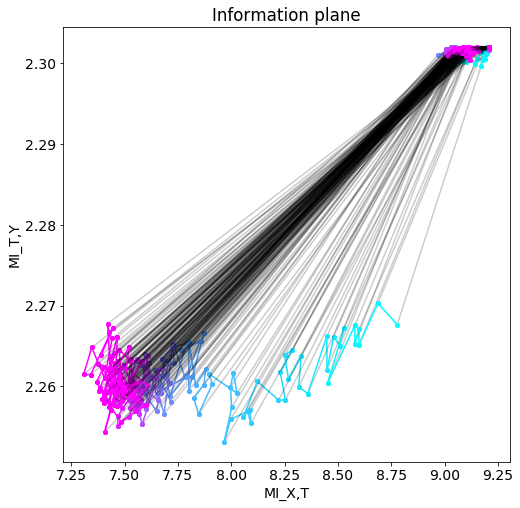

In [7]:
importlib.reload(plot_tool)
plot_tool.mi_plot(MI_client)


### Analysis: Visualization of accuracy v.s. epoches

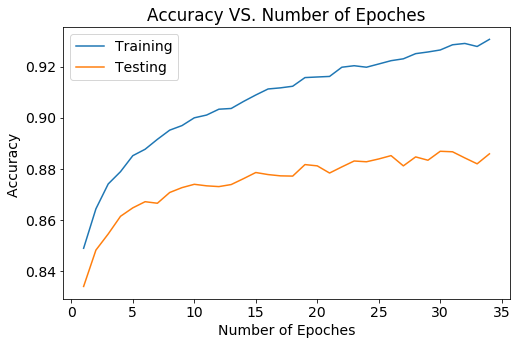

In [17]:
plot_tool.plot(model.train_log_acc, model.test_log_acc)